In [9]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [10]:
data = load_iris(as_frame=True).frame
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<Axes: >

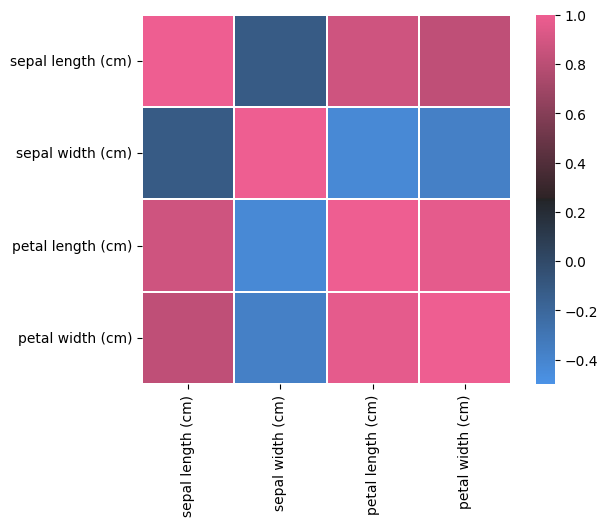

In [11]:
corr = data.iloc[:,:-1].corr(method='pearson')
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=-.5,cmap=cmap,square=True,linewidths=.2)

In [12]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [13]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val-mean)**2 / (2*std**2)))
    return p_x_given_y

In [14]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calculate_prior(df, Y)
    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

cv = StratifiedKFold(n_splits=5)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in cv.split(X, y):
    train, test = data.iloc[train_index], data.iloc[test_index]
    X_test = test.iloc[:, :-1].values
    Y_test = test.iloc[:, -1].values
    Y_pred = naive_bayes_gaussian(train, X_test, 'target')
    # na macro
    accuracy_scores.append(accuracy_score(Y_test, Y_pred))
    precision_scores.append(precision_score(Y_test, Y_pred, average='micro'))
    recall_scores.append(recall_score(Y_test, Y_pred, average='micro'))
    f1_scores.append(f1_score(Y_test, Y_pred, average='micro'))

print(f"Accuracy score: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Precision score: {np.mean(precision_scores):.2f} ± {np.std(precision_scores):.2f}")
print(f"Recall score: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"F1 score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")


Accuracy score: 0.95 ± 0.03
Precision score: 0.95 ± 0.03
Recall score: 0.95 ± 0.03
F1 score: 0.95 ± 0.03
